# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

petrol = pd.read_csv('petrol.csv')

In [42]:
petrol.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [43]:
petrol.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [44]:
petrol.dtypes

tax            float64
income           int64
highway          int64
dl             float64
consumption      int64
dtype: object

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [45]:
tax_iqr = petrol['tax'].quantile(.75)-petrol['tax'].quantile(.25)
tax_min = petrol['tax'].quantile(.25)-(1.5*tax_iqr)
tax_max =petrol['tax'].quantile(.75)+(1.5*tax_iqr)

In [46]:
income_iqr = petrol['income'].quantile(.75)-petrol['income'].quantile(.25)
income_min = petrol['income'].quantile(.25)-(1.5*income_iqr)
income_max =petrol['income'].quantile(.75)+(1.5*income_iqr)

In [47]:
hw_iqr = petrol['highway'].quantile(.75)-petrol['highway'].quantile(.25)
hw_min = petrol['highway'].quantile(.25)-(1.5*hw_iqr)
hw_max =petrol['highway'].quantile(.75)+(1.5*hw_iqr)

In [48]:
dl_iqr = petrol['dl'].quantile(.75)-petrol['dl'].quantile(.25)
dl_min = petrol['dl'].quantile(.25)-(1.5*dl_iqr)
dl_max =petrol['dl'].quantile(.75)+(1.5*dl_iqr)

In [49]:
co_iqr = petrol['consumption'].quantile(.75)-petrol['consumption'].quantile(.25)
co_min = petrol['consumption'].quantile(.25)-(1.5*co_iqr)
co_max =petrol['consumption'].quantile(.75)+(1.5*co_iqr)

In [50]:
petrol.drop(petrol[petrol.tax < tax_min].index, inplace=True)
petrol.drop(petrol[petrol.tax > tax_max].index, inplace=True)

petrol.drop(petrol[petrol.income < income_min].index, inplace=True)
petrol.drop(petrol[petrol.income > income_max].index, inplace=True)

petrol.drop(petrol[petrol.highway < hw_min].index, inplace=True)
petrol.drop(petrol[petrol.highway > hw_max].index, inplace=True)

petrol.drop(petrol[petrol.dl < dl_min].index, inplace=True)
petrol.drop(petrol[petrol.dl > dl_max].index, inplace=True)

petrol.drop(petrol[petrol.consumption < co_min].index, inplace=True)
petrol.drop(petrol[petrol.consumption > co_max].index, inplace=True)

petrol.describe()

,tax,income,highway,dl,consumption
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,7.711163,4186.837209,5209.744186,0.565535,564.744186
std,0.829932,557.816403,2773.890659,0.050616,86.805775
min,6.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3719.500000,2946.500000,0.529500,517.000000
50%,7.500000,4258.000000,4725.000000,0.563000,566.000000
75%,8.250000,4494.000000,6917.500000,0.589500,629.500000
max,9.000000,5319.000000,11868.000000,0.677000,782.000000


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

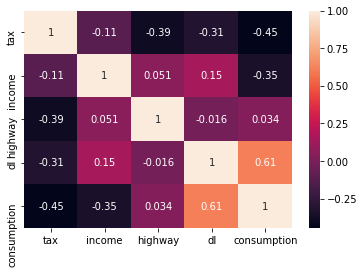

In [52]:
import seaborn as sns

corr = petrol.corr()

sns.heatmap(corr, annot=True)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [53]:
X = petrol['dl']
Y = petrol['consumption']

In [54]:
X

0     0.525
1     0.572
2     0.580
3     0.529
4     0.544
6     0.451
7     0.553
8     0.529
9     0.552
10    0.530
12    0.574
13    0.545
14    0.608
15    0.586
16    0.572
17    0.540
19    0.677
20    0.663
21    0.602
22    0.511
23    0.517
24    0.551
25    0.544
26    0.548
27    0.579
28    0.563
29    0.493
30    0.518
31    0.513
32    0.578
33    0.547
34    0.487
35    0.629
37    0.586
38    0.663
40    0.626
41    0.563
42    0.603
43    0.508
44    0.672
45    0.571
46    0.623
47    0.593
Name: dl, dtype: float64

In [55]:
Y

0     541
1     524
2     561
3     414
4     410
6     344
7     467
8     464
9     498
10    580
12    525
13    508
14    566
15    635
16    603
17    714
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
37    704
38    648
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: consumption, dtype: int64

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [56]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)

In [63]:
Y_train.shape

(34,)

In [62]:
X_train.shape

(34,)

In [65]:
Y_test.shape

(9,)

In [67]:
Y_train.shape

(34,)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [68]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

In [69]:
X_train1 = X_train.to_frame()
type(X_train1)

Y_train1 = Y_train.to_frame()
type(Y_train1)

pandas.core.frame.DataFrame

In [70]:
regr.fit(X_train1,Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
regr.coef_

array([[1160.74935797]])

In [72]:
regr.intercept_

array([-83.62936914])

In [73]:
x2 = X_train1 * 1160.74935797

In [75]:
y2 = x2+8.47574926

# R-Square 

In [76]:
Y_test2 = Y_test.to_frame()
X_test2 = X_test.to_frame()

In [78]:

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred = regr.predict(X_test2)
mse = mean_squared_error(Y_test2, y_pred)

rmse = sqrt(mse)

In [79]:
rmse

66.84145906726215

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [80]:
regr.score(Y_test2,y_pred)

-114538698.66983612

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


# Question 9: Print the coefficients of the multilinear regression model

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis